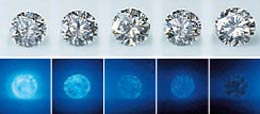

In [87]:
import pandas as pd

In [88]:
df = pd.read_csv(r"C:\Users\Israel Gitler\Desktop\Diamonds-price-prediction-model\scraped_Diamonds", sep = ',')
df.head()

,url,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price
0,https://www.jamesallen.com/loose-diamonds/roun...,0.31,L,SI2,Excellent,Excellent,Round,Excellent,None,4.34x4.37,1.01,GIA,$290
1,https://www.jamesallen.com/loose-diamonds/roun...,0.24,F,I1,Very Good,Very Good,Round,Very Good,None,3.92x3.93,1.00,GIA,$290
2,https://www.jamesallen.com/loose-diamonds/roun...,0.30,I,I1,Very Good,Very Good,Round,Very Good,None,4.27x4.23,1.01,GIA,$290
3,https://www.jamesallen.com/loose-diamonds/roun...,0.25,M,VS1,Excellent,Excellent,Round,Excellent,None,4.05x4.08,1.01,GIA,$290
4,https://www.jamesallen.com/loose-diamonds/prin...,0.31,J,VS1,Very Good,Excellent,Princess,Good,Medium,3.57x3.56,1.00,GIA,$290


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           8334 non-null   object 
 1   carat         8232 non-null   float64
 2   color         8232 non-null   object 
 3   clarity       8232 non-null   object 
 4   cut           5242 non-null   object 
 5   polish        8232 non-null   object 
 6   shape         8232 non-null   object 
 7   symmetry      8232 non-null   object 
 8   fluorescence  8232 non-null   object 
 9   lw            8232 non-null   object 
 10  lw_ratio      8232 non-null   float64
 11  certificate   8232 non-null   object 
 12  price         8334 non-null   object 
dtypes: float64(2), object(11)
memory usage: 846.5+ KB


In [90]:
df.isna().sum()

url                0
carat            102
color            102
clarity          102
cut             3092
polish           102
shape            102
symmetry         102
fluorescence     102
lw               102
lw_ratio         102
certificate      102
price              0
dtype: int64

In [91]:
df[(df.carat.isna())]

,url,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price
5526,https://www.jamesallen.com/loose-diamonds/pear...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,150"
5527,https://www.jamesallen.com/loose-diamonds/radi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,180"
5528,https://www.jamesallen.com/loose-diamonds/roun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,200"
5529,https://www.jamesallen.com/loose-diamonds/pear...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,220"
5530,https://www.jamesallen.com/loose-diamonds/cush...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,220"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,https://www.jamesallen.com/loose-diamonds/emer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,130"
5624,https://www.jamesallen.com/loose-diamonds/oval...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,140"
5625,https://www.jamesallen.com/loose-diamonds/roun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,500"
5626,https://www.jamesallen.com/loose-diamonds/emer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,500"


**There are 102 diamonds without any detail besides their prices. Because we have a lot of data, we can afford to drop them.**

In [92]:
df = df.drop(df[(df.carat.isna())].index)
df

,url,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price
0,https://www.jamesallen.com/loose-diamonds/roun...,0.31,L,SI2,Excellent,Excellent,Round,Excellent,None,4.34x4.37,1.01,GIA,$290
1,https://www.jamesallen.com/loose-diamonds/roun...,0.24,F,I1,Very Good,Very Good,Round,Very Good,None,3.92x3.93,1.00,GIA,$290
2,https://www.jamesallen.com/loose-diamonds/roun...,0.30,I,I1,Very Good,Very Good,Round,Very Good,None,4.27x4.23,1.01,GIA,$290
3,https://www.jamesallen.com/loose-diamonds/roun...,0.25,M,VS1,Excellent,Excellent,Round,Excellent,None,4.05x4.08,1.01,GIA,$290
4,https://www.jamesallen.com/loose-diamonds/prin...,0.31,J,VS1,Very Good,Excellent,Princess,Good,Medium,3.57x3.56,1.00,GIA,$290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,https://www.jamesallen.com/loose-diamonds/oval...,5.02,J,VS1,NaN,Very Good,Oval,Very Good,None,13.72x9.43,1.45,GIA,"$77,590"
8330,https://www.jamesallen.com/loose-diamonds/emer...,3.50,F,VS1,NaN,Excellent,Emerald,Excellent,None,9.96x7.3,1.36,GIA,"$77,590"
8331,https://www.jamesallen.com/loose-diamonds/roun...,2.33,E,FL,Excellent,Excellent,Round,Excellent,None,8.47x8.5,1.00,GIA,"$77,600"
8332,https://www.jamesallen.com/loose-diamonds/radi...,5.01,I,VVS2,NaN,Excellent,Radiant,Excellent,None,10.16x8.68,1.17,IGI,"$77,670"


In [93]:
df.isna().sum()

url                0
carat              0
color              0
clarity            0
cut             2990
polish             0
shape              0
symmetry           0
fluorescence       0
lw                 0
lw_ratio           0
certificate        0
price              0
dtype: int64

In [94]:
df['cut'].value_counts()

Excellent      3593
Very Good       878
Ideal           483
Good            261
True Hearts      27
Name: cut, dtype: int64

We can see that the 'Excellent' cut is the most frequnt cut. It is also the middle value in the cut rate.
so we are going to replace all the 'NaN' values of the cut feature to 'Excellent'.

In [95]:
df.cut.fillna('Excellent', inplace=True)

In [96]:
df.isna().sum()

url             0
carat           0
color           0
clarity         0
cut             0
polish          0
shape           0
symmetry        0
fluorescence    0
lw              0
lw_ratio        0
certificate     0
price           0
dtype: int64

In [97]:
categ_att=['color', 'clarity', 'cut', 'polish', 'shape','symmetry', 'fluorescence', 'certificate']
for attribute in categ_att:
    print('The different values and amounts in the attribute:'+attribute)
    print(df[attribute].value_counts())

The different values and amounts in the attribute:color
D    1306
H    1233
G    1187
F    1138
I    1064
E    1049
J     736
K     457
L      43
M      19
Name: color, dtype: int64
The different values and amounts in the attribute:clarity
VS1     1576
SI1     1503
VS2     1500
SI2     1152
VVS2    1066
VVS1     861
IF       428
I1        74
FL        72
Name: clarity, dtype: int64
The different values and amounts in the attribute:cut
Excellent      6583
Very Good       878
Ideal           483
Good            261
True Hearts      27
Name: cut, dtype: int64
The different values and amounts in the attribute:polish
Excellent    7042
Very Good    1039
Good          106
Ideal          45
Name: polish, dtype: int64
The different values and amounts in the attribute:shape
Round               4145
Emerald              797
Oval                 724
Cushion Modified     658
Pear                 625
Princess             356
Radiant              339
Heart                188
Asscher              168


We see that we have under 13 different categories in each categorial attribute. we will change them to numerical values according to their rate (from worst to best) that is showen in the information in the beginning.
The shape attribute has no rate and there isnt a shape that is better than the others so we will later use the get_dummies method to deal with it.

In [98]:
df['color']=df['color'].map({'M':1, 'L':2, 'K':3, 'J':4, 'I':5, 'H':6, 'G':7, 'F':8, 'E':9, 'D':10})
df['clarity']=df['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8, 'FL':9})
df['cut']=df['cut'].map({'Good':1, 'Very Good':2, 'Excellent':3, 'Ideal':4, 'True Hearts':5})
df['polish']=df['polish'].map({'Good':1, 'Very Good':2, 'Excellent':3, 'Ideal':4})
df['symmetry']=df['symmetry'].map({'Good':1, 'Very Good':2, 'Excellent':3, 'Ideal':4})
df['fluorescence']=df['fluorescence'].map({'Strong Blue':1, 'Strong':1, 'Medium Blue':2, 'Medium':2, 'Slight':3, 'Faint':4, 'Negligible':5, 'None':6})
df['certificate']=df['certificate'].map({'AGS':1, 'IGI':2, 'GIA':3})

changing the price column to int and dividing the lw colume into 2 integer columns. in additoin we will drop the url column because it isnt necessery.

In [99]:
df=df.drop('url', axis=1)

In [105]:
beginings = []
for price in df['price']:
    if ((price[0] > '9') or (price[0] < '0')) and price[0] not in beginings:
        beginings.append(price[0])
beginings

['A', '€', '£', 'C', 'H']

we recognize $,€,£. lets find the meaning of the currencies that start with A,C,H.

In [117]:
print((df[df['price'].str[0].isin(['A'])])['price'].head(1))
print((df[df['price'].str[0].isin(['C'])])['price'].head(1))
print((df[df['price'].str[0].isin(['H'])])['price'].head(1))

160    AU$2349
Name: price, dtype: object
5261    CA$66883
Name: price, dtype: object
7702    HK$677379
Name: price, dtype: object


so we found that there are prices in AUD - australian dollar, CAD - canadian dollar, HKD - Hong Kong dollar.

we want the entire price column to be in the same currency- USD. so we will convert now all the other currency to dollar. we will do it according to this rate:
AUD=0.72 USD.

CAD=0.79 USD.

HKD=0.13 USD.

In [102]:
df['price'] = df['price'].map(lambda x:x.lstrip('$').replace(',',''))
#df['price'] = pd.to_numeric(df['price'])
df

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price
0,0.31,2,2,3,3,Round,3,6,4.34x4.37,1.01,3,290
1,0.24,8,1,2,2,Round,2,6,3.92x3.93,1.00,3,290
2,0.30,5,1,2,2,Round,2,6,4.27x4.23,1.01,3,290
3,0.25,1,5,3,3,Round,3,6,4.05x4.08,1.01,3,290
4,0.31,4,5,2,3,Princess,1,2,3.57x3.56,1.00,3,290
...,...,...,...,...,...,...,...,...,...,...,...,...
8329,5.02,4,5,3,2,Oval,2,6,13.72x9.43,1.45,3,77590
8330,3.50,8,5,3,3,Emerald,3,6,9.96x7.3,1.36,3,77590
8331,2.33,9,9,3,3,Round,3,6,8.47x8.5,1.00,3,77600
8332,5.01,5,6,3,3,Radiant,3,6,10.16x8.68,1.17,2,77670


In [60]:
(df[df.fluorescence=='Medium']).certificate.value_counts()

GIA    849
AGS      3
Name: certificate, dtype: int64